# 利用scikit-learn进行数据预处理


<img src="https://github.com/awantik/machine-learning-slides/blob/master/ML-Pipeline.png?raw=true">

## Agenda

* 1. Introduction to Preprocessing

* 2. StandardScaler

* 3. MinMaxScaler

* 4. RobustScaler

* 5. Normalization

* 6. Binarization

* 7. Encoding Categorical (Ordinal & Nominal) Features

* 8. Imputation

* 9. Polynomial Features

#### Common import

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

## 1. 预处理简介

* 学习算法对某些数据模式具有亲和力。

* 未标定或非标准化的数据可能具有不可接受的预测

* 学习算法只能理解数字，需要将文本图像转换为数字

* 预处理是指在喂给机器学习之前的转换


<img src="https://github.com/awantik/machine-learning-slides/blob/master/pp5.PNG?raw=true">


## 2. StandardScaler（important）
* StandardScaler假设您的数据在每个要素中正态分布，并将对其进行缩放，使得分布现在以0为中心，标准差为1。

* 计算公式：



<img src="https://github.com/awantik/machine-learning-slides/blob/master/pp4.PNG?raw=true">


* 如果数据不是正态分布的，那么这不是最好的缩放器。

In [24]:
#Generating normally distributed data

df = pd.DataFrame({
    'x1': np.random.normal(0, 2, 10000),
    'x2': np.random.normal(5, 3, 10000),
    'x3': np.random.normal(-5, 5, 10000)
})

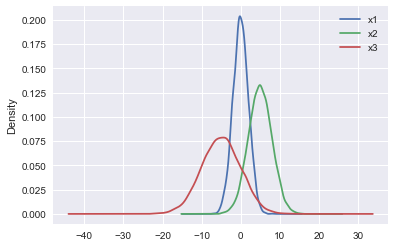

In [25]:
# plotting data

df.plot.kde()

In [26]:
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()

In [27]:
data_tf = standardscaler.fit_transform(df)

In [28]:
df = pd.DataFrame(data_tf, columns=['x1','x2','x3'])

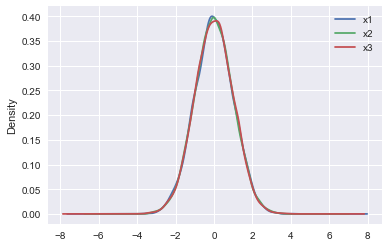

In [29]:
df.plot.kde()

## 3. MinMaxScaler（important）
* 其中最受欢迎的

* 计算公式：




<img src="https://github.com/awantik/machine-learning-slides/blob/master/pp3.PNG?raw=true">



* 数据在0和1之间转换
* 如果数据分布不适用于StandardScaler，则此缩放器可用。
* 对离群值敏感

In [30]:
df = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(8, 1000),
    # negative skew 
    'x2': np.random.beta(8, 2, 1000) * 40,
    # no skew
    'x3': np.random.normal(50, 3, 1000)
})

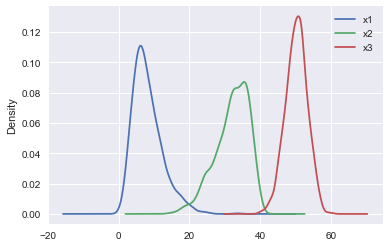

In [31]:
df.plot.kde()

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
minmax = MinMaxScaler()
data_tf = minmax.fit_transform(df)

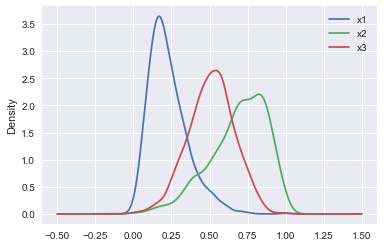

In [34]:
df = pd.DataFrame(data_tf,columns=['x1','x2','x3'])
df.plot.kde()

## 4. Robust Scaler
* 适合带有异常值的数据
* 计算公式：






<img src="https://github.com/awantik/machine-learning-slides/blob/master/pp2.PNG?raw=true">

In [35]:
df = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 1, 1000), np.random.normal(1, 1, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 1, 1000), np.random.normal(50, 1, 25)]),
})

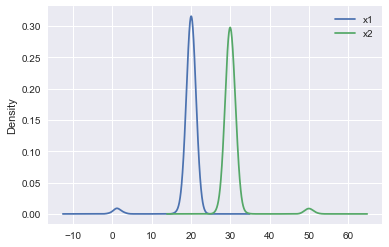

In [36]:
df.plot.kde()

In [37]:
from sklearn.preprocessing import RobustScaler
robustscaler = RobustScaler()

In [38]:
data_tf = robustscaler.fit_transform(df)
df = pd.DataFrame(data_tf, columns=['x1','x2'])

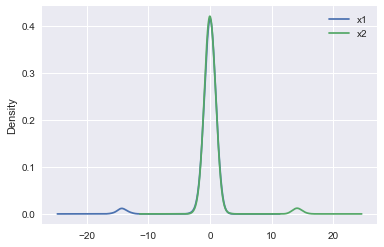

In [39]:
df.plot.kde()

## 5. Normalizer（important）
* 通过除以幅度获得每个参数值
* 将数据集中到原点

<img src="https://github.com/awantik/machine-learning-slides/blob/master/pp1.PNG?raw=true">


In [40]:
df = pd.DataFrame({
    'x1': np.random.randint(-100, 100, 1000).astype(float),
    'y1': np.random.randint(-80, 80, 1000).astype(float),
    'z1': np.random.randint(-150, 150, 1000).astype(float),
})

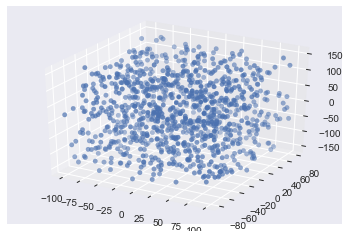

In [41]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df.x1, df.y1, df.z1)

In [42]:
from sklearn.preprocessing import Normalizer

In [43]:
normalizer = Normalizer()
data_tf = normalizer.fit_transform(df)

In [44]:
df = pd.DataFrame(data_tf, columns=['x1','y1','z1'])

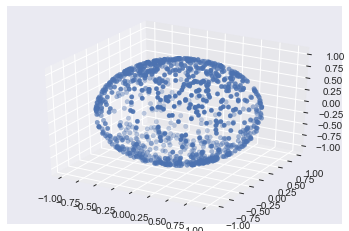

In [45]:
ax = plt.axes(projection='3d')
ax.scatter3D(df.x1, df.y1, df.z1)

## 6. Binarization
* 将数值阈值化为二进制值（0或1）
* 一些学习算法假设数据是伯努利分布 - 伯努利的朴素贝叶斯

In [46]:
X = np.array([[ 1., -1.,  2.],
              [ 2.,  0.,  0.],
              [ 0.,  1., -1.]])

In [47]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer()

In [48]:
data_tf = binarizer.fit_transform(X)

In [49]:
data_tf

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

## 7. Encoding Categorical Values 编码分类值（important）

#### Encoding Ordinal Values 编码序数值

* 序数值 - 低，中，高。 价值之间的关系
* 带有正确映射的标签编码

In [50]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Income':['Low','Low','High','Medium','Medium','High']})

In [51]:
df

,Age,Income
0,33,Low
1,44,Low
2,22,High
3,44,Medium
4,55,Medium
5,22,High


In [52]:
df.Income.map({'Low':1,'Medium':2,'High':3})

0    1
1    1
2    3
3    2
4    2
5    3
Name: Income, dtype: int64

#### Encoding Nominal Values 编码名义价值

* 名义价值观 - 男性，女性。 数据之间没有关系

* One Hot Encoding for converting data into one-hot vector

In [53]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Gender':['Male','Female','Male','Female','Male','Male']})

In [54]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [55]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [56]:
le = LabelEncoder()
df['gender_tf'] = le.fit_transform(df.Gender)
df

,Age,Gender,gender_tf
0,33,Male,1
1,44,Female,0
2,22,Male,1
3,44,Female,0
4,55,Male,1
5,22,Male,1


In [57]:
OneHotEncoder().fit_transform(df[['gender_tf']]).toarray()

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

## 8. Imputation缺失值处理
* 学习算法无法处理缺失的值
* Imputers可用于从现有数据中推断缺失数据的价值

In [58]:
df = pd.DataFrame({
    'A':[1,2,3,4,np.nan,7],
    'B':[3,4,1,np.nan,4,5]
})

In [59]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='mean', axis=1)

In [60]:
imputer.fit_transform(df)

array([[1., 3.],
       [2., 4.],
       [3., 1.],
       [4., 4.],
       [4., 4.],
       [7., 5.]])

## 9. Polynomial Features多项式特征
* Deriving non-linear feature by coverting data into higher degree通过将数据转换为更高程度来推导非线性特征
* Used with linear regression to learn model of higher degree与线性回归一起使用以学习更高程度的模型

In [61]:
df = pd.DataFrame({'A':[1,2,3,4,5], 'B':[2,3,4,5,6]})
df

,A,B
0,1,2
1,2,3
2,3,4
3,4,5
4,5,6


In [62]:
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(degree=2)

In [63]:
pol.fit_transform(df)

array([[ 1.,  1.,  2.,  1.,  2.,  4.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  3.,  4.,  9., 12., 16.],
       [ 1.,  4.,  5., 16., 20., 25.],
       [ 1.,  5.,  6., 25., 30., 36.]])

## 10. Custom Transformer 
* 通常，您需要将现有的Python函数转换为变换器以协助数据清理或处理。
* FunctionTransformer用于创建一个Transformer
* validate = False，是字符串列所必需的

In [64]:
from sklearn.preprocessing import FunctionTransformer

In [65]:
def mapping(x):
    x['Age'] = x['Age']+2
    x['Counter'] = x['Counter'] * 2
    return x

In [66]:
customtransformer = FunctionTransformer(mapping, validate=False)

In [67]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Counter':[3,4,2,4,5,2],
     })
df

,Age,Counter
0,33,3
1,44,4
2,22,2
3,44,4
4,55,5
5,22,2


In [68]:
customtransformer.transform(df)

,Age,Counter
0,35,6
1,46,8
2,24,4
3,46,8
4,57,10
5,24,4
